In [1]:
#

In [2]:
import numpy as np
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
import pandas as pd

#

In [3]:
df = pd.read_csv('abalone.data', header=None, names=['Sex', 'Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'])

df['Mcubed_per_whole_weight'] = (df['Height'] * df['Diameter'] * df['Length']) / df['Whole']
df['Mcubed_per_shucked_weight'] = (df['Height'] * df['Diameter'] * df['Length']) / df['Shucked']
df['Mcubed_per_viscera_weight'] = (df['Height'] * df['Diameter'] * df['Length']) / df['Viscera']
df['Mcubed_per_shell_weight'] = (df['Height'] * df['Diameter'] * df['Length']) / df['Shell']

#

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())

#

LogisticRegression Mean: 0.553509345633541 STD: 0.052896521535807414


In [5]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())

#

LogisticRegression Mean: 0.5554215001204778 STD: 0.049659058536711896


In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())


#

LogisticRegression Mean: 0.5561420719883423 STD: 0.055433966825221795


In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())


#

LogisticRegression Mean: 0.5563813064381031 STD: 0.0488962714697667


In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())


#

LogisticRegression Mean: 0.514008123644625 STD: 0.019217683698842556


In [9]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Length', 'Diameter', 'Height', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())


#

LogisticRegression Mean: 0.5298090714031647 STD: 0.022515660789819415


In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())


#

LogisticRegression Mean: 0.541302077954861 STD: 0.044714745148332735


In [11]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=320)
scores = cross_val_score(
    clf,
    df.loc[:, ['Whole', 'Shucked', 'Viscera', 'Shell', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight']].to_numpy(),
    np.ravel(df.loc[:, ['Sex']].to_numpy()),
    cv=10
)
print("LogisticRegression Mean:", scores.mean(), "STD:", scores.std())

#

LogisticRegression Mean: 0.5434511720766928 STD: 0.04461657536249988


Notes:
- Original Features
    * The original features produced 55% percent accuracy and std of 5.3% (With and without 'Ring' attribute didn't affect at all since regress was 1%).
    * With engineered features, the accuracy was 56% with std of 6.4%. Slight improvement. With or without 'Ring' attribute didn't affect performance accuracy whatsover.
- The dimension measurements:
    * On their own, it was 51.4% accruacy with 0.02% std.
    * with engineered features of mm/gram rates, accuracy was 53% with 0.02 std. Slight improvement.
- The weight measurements:
    * On their own, it was 54% accuracy with std of 4.5% std.
    * with engineered features of mm/gram rates, accuracy was 54% with 4.5% std.  Pretty much no improvement.

Deductions:
- It looks like the top accuracy is with original features. Engineered features improved it by 1%.
- Dimension and weight measurements couldn't deliver top accuracy compared to combined: differences is 3.6% and 1% respectively.
- What's interesting that dimension measurements were improved with weight-dimension-rates features to give it extra 2% accuracy. I guess that weights with dimensions help to determine gender of the shell better.




Ok, after learning about linear and logistic regressions, I gotta admit I gotta improve maths to understand logistic regression when presenting a line via a logistic function and how the best line is determined.

But I did read on documentation site that Logistic Regression can do three approach types as to predict a class: binary, "one vs rest" and multinomial:
- binary: Basically it's whether true or false for a particular statement in question (i.e. Only two classes of true or false given if a person is obese or not.)
- "One vs rest" is when you train multiple classifiers for each class and then compare the percentages.
-  multinomialis basically when you can use a logistic function to train a model for all classes in one go and fit them in the same one.

In below section, I will look at different settings for each of the approaches for solvers (e.g. algorithms to determine the best line (I think)) to see how they perform.



In [12]:
# Set a specific set of features as to automate testing process for each set.
FEATURES = [
    (['Length', 'Diameter', 'Height'], "Only dimensions"),
    (['Whole', 'Shucked', 'Viscera', 'Shell'], "Only weights"),
    (['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell'], "All without Rings"),
    (['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Rings'], "All + Rings"),
    (['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight'], "Dimensions + weights + Mcubed_weight_rates"),
    (['Whole', 'Shucked', 'Viscera', 'Shell', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight'], "weights + Mcubed_weight_rates"),
    (['Length', 'Diameter', 'Height', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight'], "Dimensions + Mcubed_weight_rates")
]

def print_results(title, results):
    '''Print pre-formatted results'''
    print(title)
    print('\n'.join([str(round(result, 3)) + " : " + str(features_set)
                     for result, features_set in results]))

#

 Training for One-vs-Rest Section
Using linearRegressionCV because it's a variant for Crosss validation where it can deteremine best hyperparameter for coeficients. I will leave out the argument for `cv` (i.e. a number of folds to perform) since the CV variant of LinearRegression selects best hyperparamters by using StratifiedKFold that is used to split the samples of class proportianally against actual number of classes.



In [13]:
# `liblinear` solver

from sklearn.linear_model import LogisticRegressionCV

y = np.ravel(df.loc[:, ['Sex']].to_numpy())

results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='liblinear', multi_class='ovr')
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("One-vs-Rest liblinear", results)


#

One-vs-Rest liblinear
0.508 : Only dimensions
0.552 : Only weights
0.558 : All without Rings
0.56 : All + Rings
0.565 : Dimensions + weights + Mcubed_weight_rates
0.552 : weights + Mcubed_weight_rates
0.543 : Dimensions + Mcubed_weight_rates


In [14]:
# 'lbfgs' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='lbfgs', multi_class='ovr', max_iter=300)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("One-vs-rest lbfgs", results)

#

One-vs-rest lbfgs
0.515 : Only dimensions
0.553 : Only weights
0.559 : All without Rings
0.559 : All + Rings
0.565 : Dimensions + weights + Mcubed_weight_rates
0.551 : weights + Mcubed_weight_rates
0.539 : Dimensions + Mcubed_weight_rates


In [15]:
# 'sag' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='sag', multi_class='ovr', max_iter=8000, n_jobs=-1)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("One-vs-rest sag", results)

#

One-vs-rest sag
0.514 : Only dimensions
0.553 : Only weights
0.559 : All without Rings
0.559 : All + Rings
0.563 : Dimensions + weights + Mcubed_weight_rates
0.556 : weights + Mcubed_weight_rates
0.537 : Dimensions + Mcubed_weight_rates


In [16]:
# 'saga' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='saga', multi_class='ovr', max_iter=8000, n_jobs=-1)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("One-vs-rest saga", results)

#

One-vs-rest saga
0.515 : Only dimensions
0.553 : Only weights
0.559 : All without Rings
0.558 : All + Rings
0.562 : Dimensions + weights + Mcubed_weight_rates
0.554 : weights + Mcubed_weight_rates
0.536 : Dimensions + Mcubed_weight_rates


 Multinomial section
This section is dedicated for solvers that can solve multi-classification via multinomial functions (i.e. train all in one model).

Note: I tried to affect the penaly parameter for newton and it refused to train because it said that LogisticRegressionCV doesn't implement 'none' and the parameter value is useless.

Thus I shall leave it out as per output message.



In [17]:
# 'lbfgs' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='lbfgs', multi_class='multinomial', max_iter=800)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("Multinomial lbfgs", results)

#

Multinomial lbfgs
0.526 : Only dimensions
0.55 : Only weights
0.557 : All without Rings
0.562 : All + Rings
0.565 : Dimensions + weights + Mcubed_weight_rates
0.558 : weights + Mcubed_weight_rates
0.563 : Dimensions + Mcubed_weight_rates


In [18]:
# 'newton-cg' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='newton-cg', multi_class='multinomial', max_iter=800)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("Multinomial newton-cg", results)

#

Multinomial newton-cg
0.527 : Only dimensions
0.55 : Only weights
0.558 : All without Rings
0.56 : All + Rings
0.565 : Dimensions + weights + Mcubed_weight_rates
0.558 : weights + Mcubed_weight_rates
0.564 : Dimensions + Mcubed_weight_rates


In [19]:
# 'sag' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='sag', multi_class='multinomial', max_iter=8000, n_jobs=-1)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("Multinomial sag", results)

#

Multinomial sag
0.526 : Only dimensions
0.55 : Only weights
0.558 : All without Rings
0.561 : All + Rings
0.564 : Dimensions + weights + Mcubed_weight_rates
0.558 : weights + Mcubed_weight_rates
0.562 : Dimensions + Mcubed_weight_rates


In [20]:
# 'saga' solver
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='saga', multi_class='multinomial', max_iter=8000, n_jobs=-1)
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("Multinomial saga", results)


#

Multinomial saga
0.527 : Only dimensions
0.55 : Only weights
0.558 : All without Rings
0.559 : All + Rings
0.564 : Dimensions + weights + Mcubed_weight_rates
0.558 : weights + Mcubed_weight_rates
0.562 : Dimensions + Mcubed_weight_rates


In [21]:
# 'saga' solver with 'elasticnet' penalty
results = []
for features_set, set_name in FEATURES:
    X = df.loc[:, features_set].to_numpy()
    lrcv = LogisticRegressionCV(solver='saga', multi_class='multinomial', max_iter=8000, n_jobs=-1, penalty='elasticnet', l1_ratios=[0.1, 0.3, 0.6])
    lrcv.fit(X, y)
    results.append([lrcv.score(X, y), set_name])

print_results("Multinomial saga with elasticnet", results)


#

Multinomial saga with elasticnet
0.526 : Only dimensions
0.55 : Only weights
0.561 : All without Rings
0.559 : All + Rings
0.564 : Dimensions + weights + Mcubed_weight_rates
0.558 : weights + Mcubed_weight_rates
0.563 : Dimensions + Mcubed_weight_rates


 Observations



Ok despite results I can only guess that the models struggle to predict at least 40% of the time simply because the distribution between 'male' and 'female' classes are very similar.

So I am going to test whether the accuracy rate will be increased by 20% to 40% percent if I only train models for two distinct sexes.



In [22]:
# Training just 'infant' and 'female'

X = df[df['Sex'].isin(['I', 'F'])]
y = np.ravel(X.loc[:, ['Sex']].to_numpy())
X = X.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()

lrcv = LogisticRegressionCV(max_iter=3000)
lrcv.fit(X, y)
lrcv.score(X, y)

#

0.8218195545488863

In [23]:
# Looking at data
# X[2]
# y[3]
# df_copy = df.copy()
# sl = df_copy[df_copy['Sex'].isin(['I', 'F'])]
# sl.Sex.unique()
# X = sl.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
# y = np.ravel(sl.loc[:, ['Sex']].to_numpy())
# len(X)
# len(y)
# lrcv = LogisticRegressionCV(max_iter=3000)
# lrcv.fit(X, y)
# lrcv.score(X, y)

# Damn, just realised I made a big mistake.


#

In [24]:
# Training just 'infant' and 'male'

X = df[df['Sex'].isin(['I', 'M'])]
# X.loc[:,'Sex'] = X['Sex'].apply(lambda sex: 0.0 if sex == 'I' else 1.0)
y = np.ravel(X.loc[:, ['Sex']].to_numpy())
X = X.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()

lrcv = LogisticRegressionCV(max_iter=3000)
lrcv.fit(X, y)
lrcv.score(X, y)


#

0.794773519163763

In [25]:
# Training just 'infant' and 'female'

X = df[df['Sex'].isin(['I', 'F'])]
#X.loc[:,'Sex'] = X['Sex'].apply(lambda sex: 0.0 if sex == 'I' else 1.0)

y = np.ravel(X.loc[:, ['Sex']].to_numpy())
X = X.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()

lrcv = LogisticRegressionCV(max_iter=3000)
lrcv.fit(X, y)
lrcv.score(X, y)

#

0.8218195545488863

**UPDATE**: due to code mistake, the results are not strange anymore and totally make sense upon the expectation: making models to predict between two labels than three improves the model dramatically.

Ok this is really weird: basically that didn't make any difference in performance at all. It's as if model is struggling to understand the differences between two classes even though they are distinct from each other. Maybe because the cross-section where certain samples of both classes meet, but again.

I will have to manually select test samples as to determine...

Ok scratch the above: I think the reason the model is not as assucate is simplye due to outliers. After looking at the graphs again, I see quite plenty of outliers for each sex and different weight and dimension attribute.

Therefore, I would like to meddle with data to make a much more accurate model (for the data sample anyway since it might not work generally better with unknown data but let's see!).

I am going to play with Infant and Male sexes since their value distributions look very distinc for 25% and 75% in boxplots and then:
1. I will remove the outliers first as to preserve the values within box plot distribution (i.e. values within 'whiskers').
2. Then I will remove samples in upper whiskers for 'Infant' class. This is because I would like to see a higher accuracy model since I want to confirm my understanding that a clear distinction between classes will make a model more accurate albeit with overfitting possibility and facing unknown values.



# Step 1: removing outliers



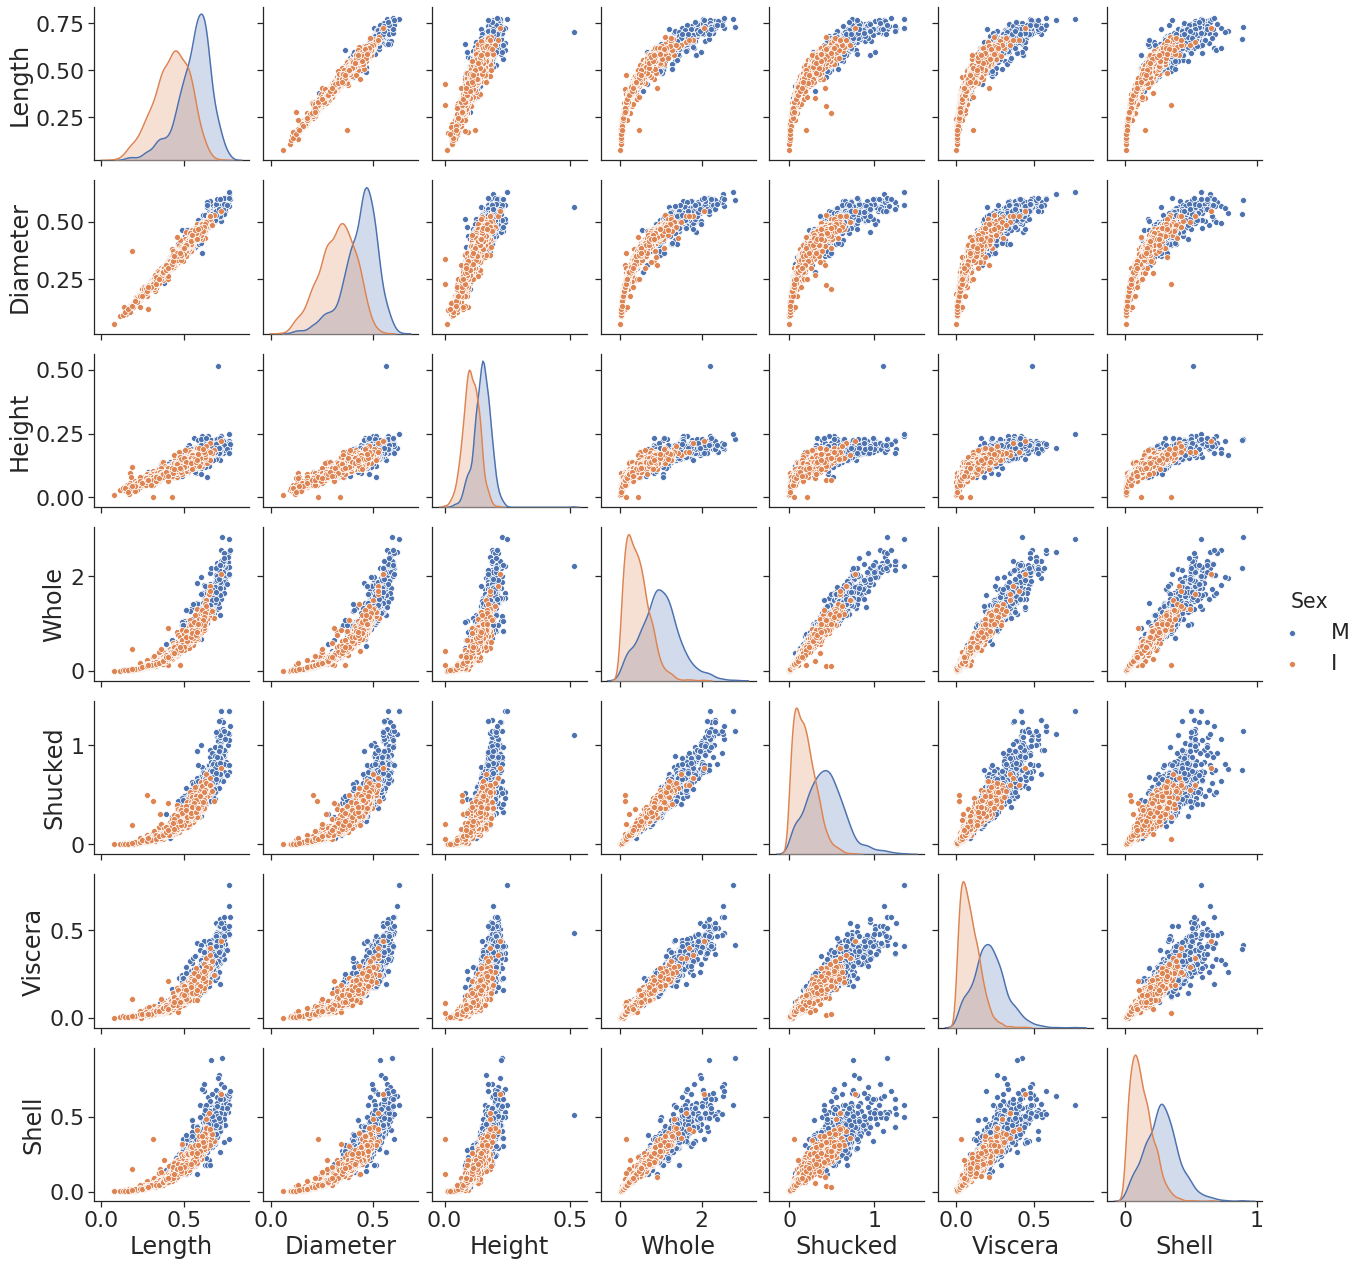

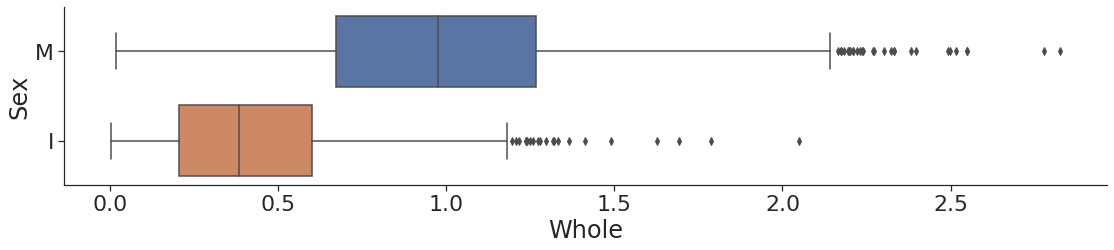

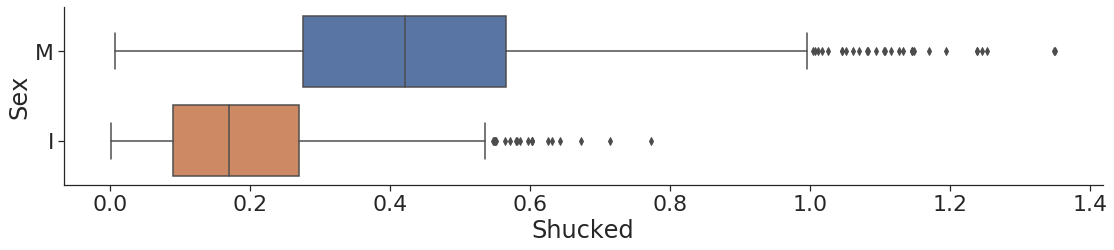

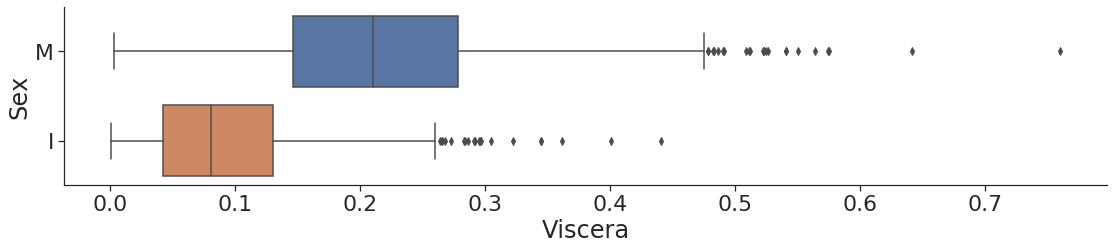

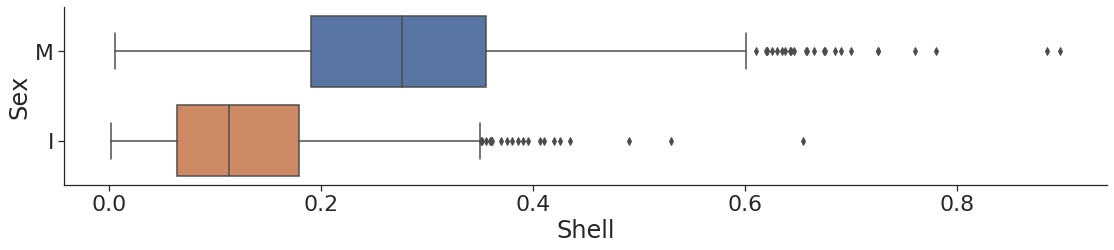

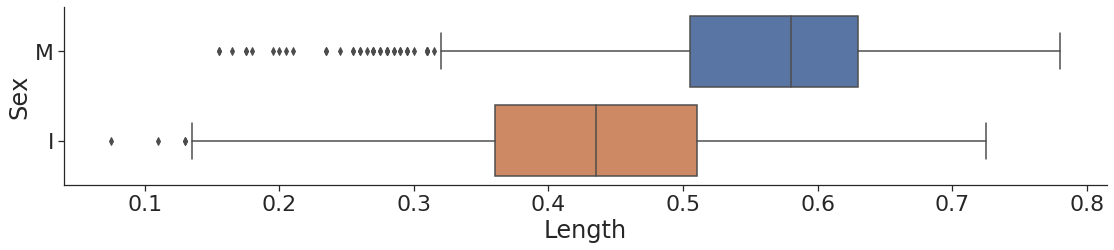

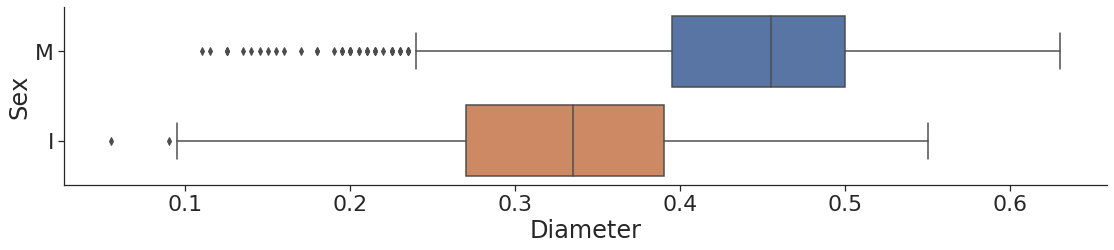

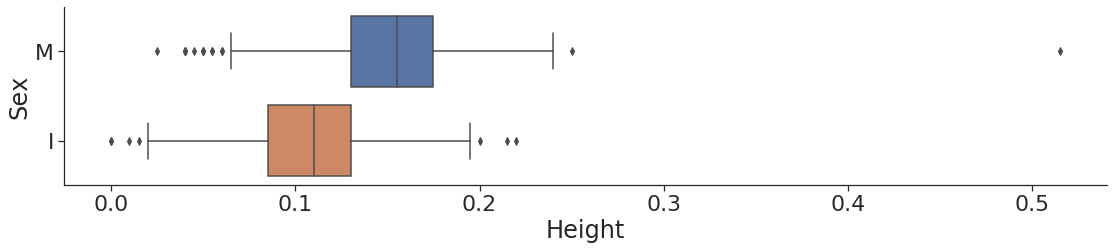

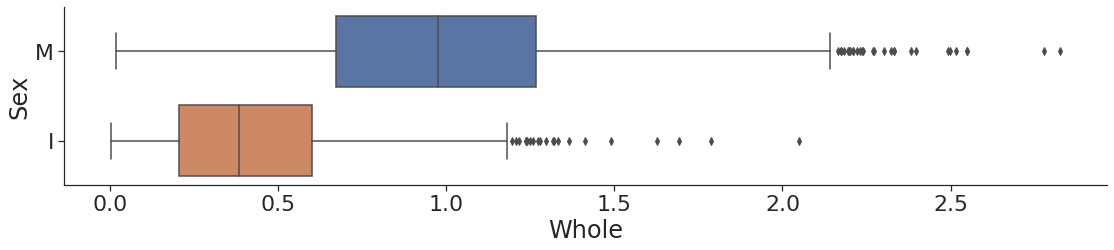

In [26]:
# Looking at original dataset graphs
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=2)

male_inf_df = df[df['Sex'].isin(['I', 'M'])]

g = sns.pairplot(male_inf_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Sex']], hue='Sex')

g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Shucked", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Viscera", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Shell", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Length", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Diameter", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
#

Observations:
- There are plenty of outliers after the upper whisker for weight-related attributes.
- There are plenty of outliers before lower bound whiskers for the male class and dimension-related attributes, but the infant class has some as well.


<ipython-input-27-03da5b326745>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['Sex'] == sex]
<ipython-input-27-03da5b326745>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[df['Sex'] == sex]


0.0175

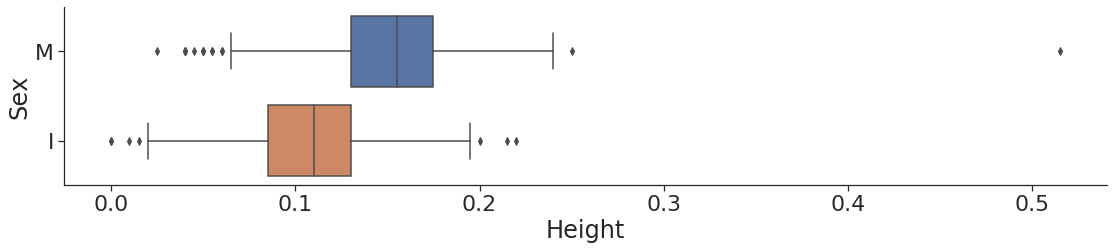

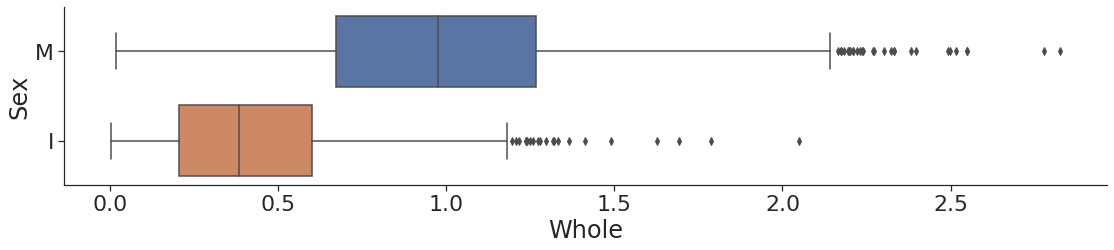

In [27]:
# Removing outliers from the data.
# First let's do weight related outliers thus calculating the whiskers.
def get_upper_whiskers(data, column, sex=''):
    if sex:
        data = data[df['Sex'] == sex]
    upper_quartile = data.describe().loc["75%"][column]
    lower_quartile = data.describe().loc["25%"][column]
    return upper_quartile + (1.5 * (upper_quartile - lower_quartile))

def get_lower_whiskers(data, column, sex=''):
    if sex:
        data = data[df['Sex'] == sex]
    upper_quartile = data.describe().loc["75%"][column]
    lower_quartile = data.describe().loc["25%"][column]
    if (lower_whiskers := lower_quartile - (1.5 * (upper_quartile - lower_quartile))) < 0:
        return 0
    else:
        return lower_whiskers

# For comparison
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g.savefig('diagram_images_folder/binary_height_box_plot.png', bbox_inches='tight', pad_inches=1)
g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g.savefig('diagram_images_folder/binary_whole_box_plot.png', bbox_inches='tight', pad_inches=1)
get_upper_whiskers(male_inf_df, 'Whole', 'I')
get_upper_whiskers(male_inf_df, 'Whole', 'M')
get_lower_whiskers(male_inf_df, 'Whole', 'I')
get_lower_whiskers(male_inf_df, 'Height', 'I')
# Ok looks the values are correct
#

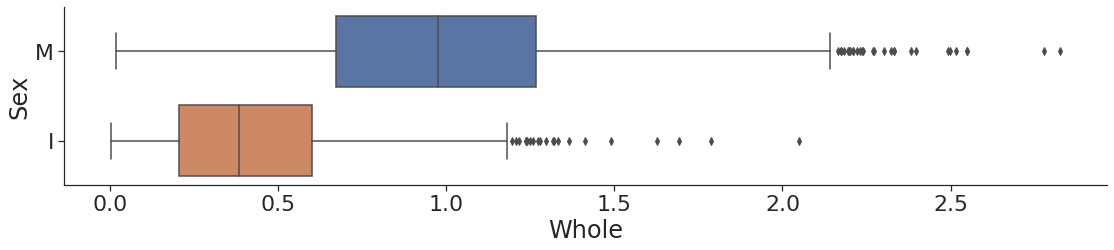

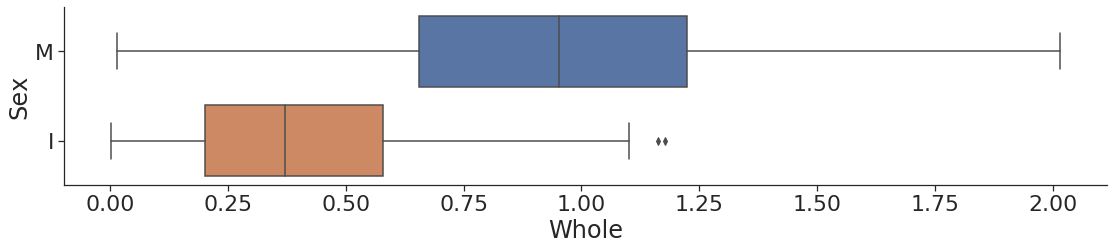

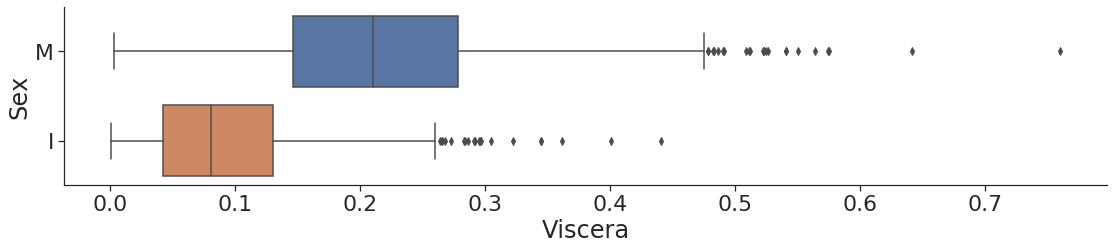

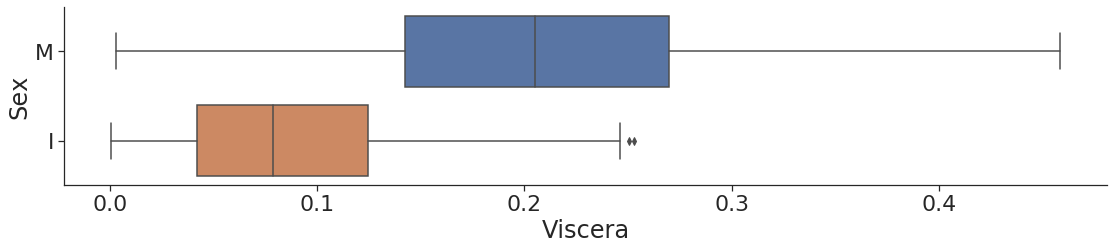

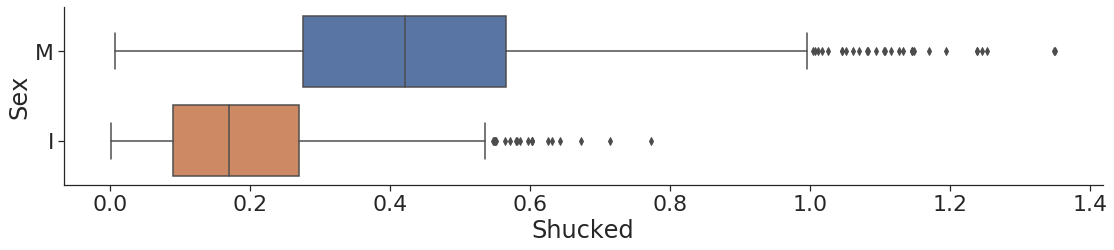

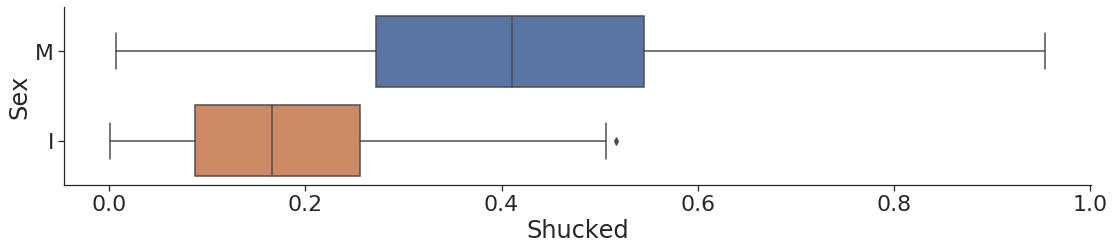

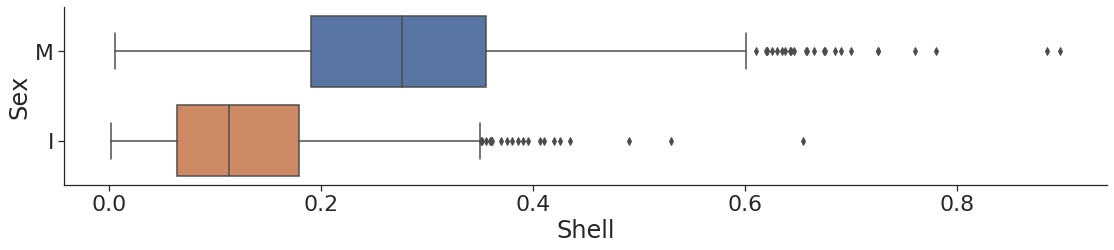

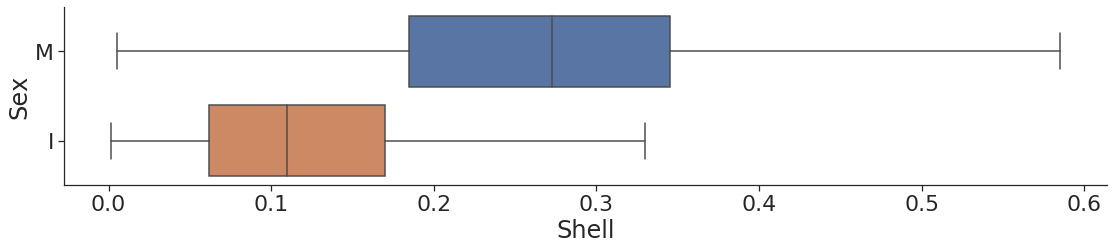

In [28]:
# Removing outliers above upper whiskers for Whole weight for both infant and male
male = male_inf_df[male_inf_df['Sex'] == 'M']
infant = male_inf_df[male_inf_df['Sex'] == 'I']
# Removing the outliers for the whole weight for each class
male = male[male['Whole'] <= get_upper_whiskers(male, 'Whole')]
infant = infant[infant['Whole'] <= get_upper_whiskers(infant, 'Whole')]
male = male[male['Viscera'] <= get_upper_whiskers(male, 'Viscera')]
infant = infant[infant['Viscera'] <= get_upper_whiskers(infant, 'Viscera')]
male = male[male['Shucked'] <= get_upper_whiskers(male, 'Shucked')]
infant = infant[infant['Shucked'] <= get_upper_whiskers(infant, 'Shucked')]
male = male[male['Shell'] <= get_upper_whiskers(male, 'Shell')]
infant = infant[infant['Shell'] <= get_upper_whiskers(infant, 'Shell')]


g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))
g = sns.catplot(x="Viscera", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Viscera", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))
g = sns.catplot(x="Shucked", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Shucked", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))
g = sns.catplot(x="Shell", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Shell", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))


# Ok let's not get perfectionist, but it does look like almost all outliers have been removed as programmed.
# I think the reason there are outliers is because there must have been some samples that were in the middle of the box and as a result the values for whiskers as well as upper and lower quartiles have been updated.
# Other than that, the distribution for within box and the whiskers seem to be preserved.

#

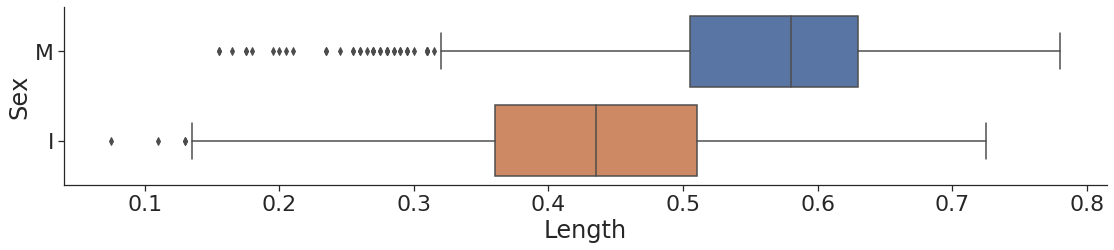

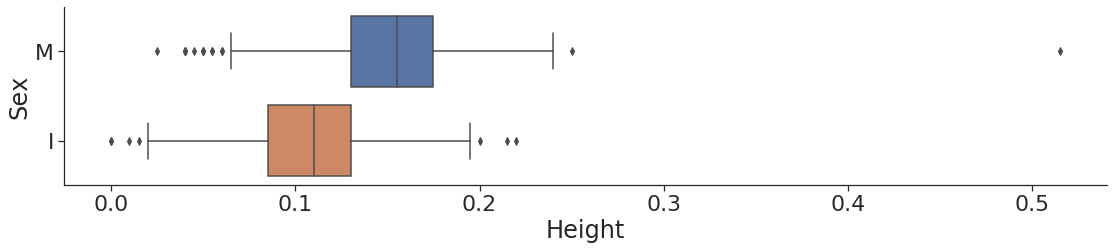

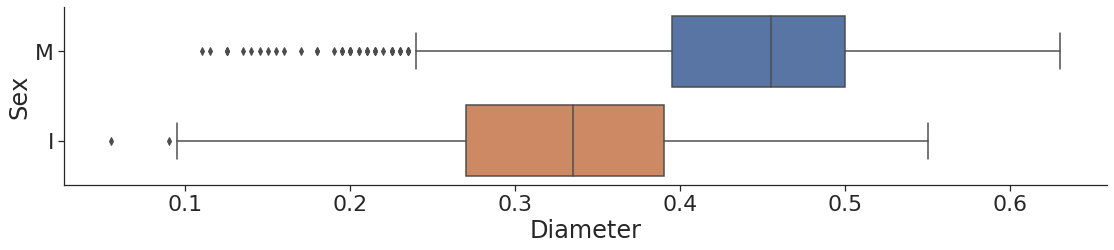

In [29]:
# Ok now gonna look at dimensions
g = sns.catplot(x="Length", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)
g = sns.catplot(x="Diameter", y="Sex", kind="box", height=4, aspect=4, data=male_inf_df)

# Ok it looks like there are plenty of outliers below the lower bound whiskers. Let's remove them.

#

In [30]:
# Removing outliers below lower bound whisker.
male = male[male['Length'] >= get_lower_whiskers(male, 'Length')]
infant = infant[infant['Length'] >= get_lower_whiskers(infant, 'Length')]
male = male[male['Diameter'] >= get_lower_whiskers(male, 'Diameter')]
infant = infant[infant['Diameter'] >= get_lower_whiskers(infant, 'Diameter')]
male = male[male['Height'] >= get_lower_whiskers(male, 'Height')]
infant = infant[infant['Height'] >= get_lower_whiskers(infant, 'Height')]

#

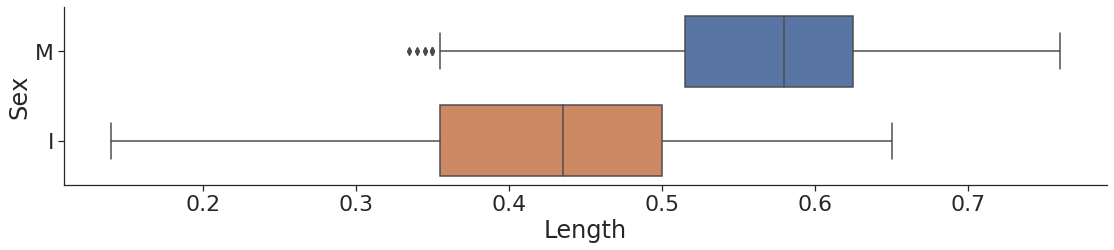

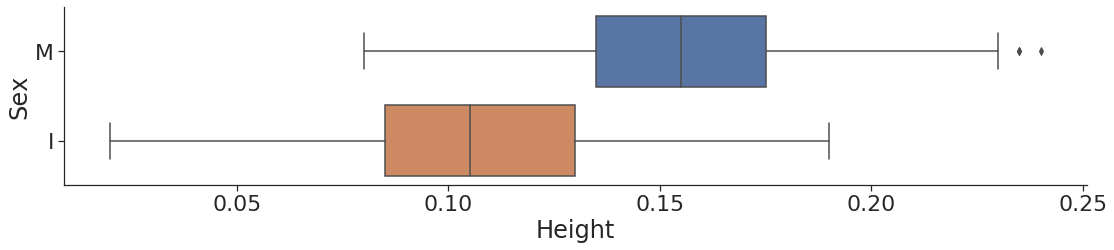

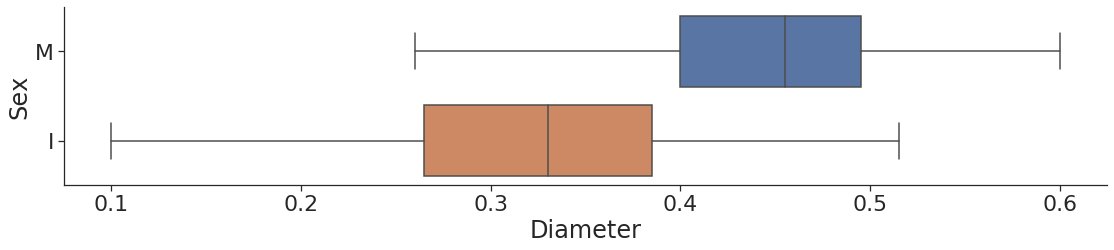

In [31]:
# Now looking at attributes now
g = sns.catplot(x="Length", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))
g = sns.catplot(x="Diameter", y="Sex", kind="box", height=4, aspect=4, data=pd.concat([male, infant]))

# Ok it looks like the ouliers are (almost) completely removed. Also looked at the weight and it looks like they seem pretty much the same.

#

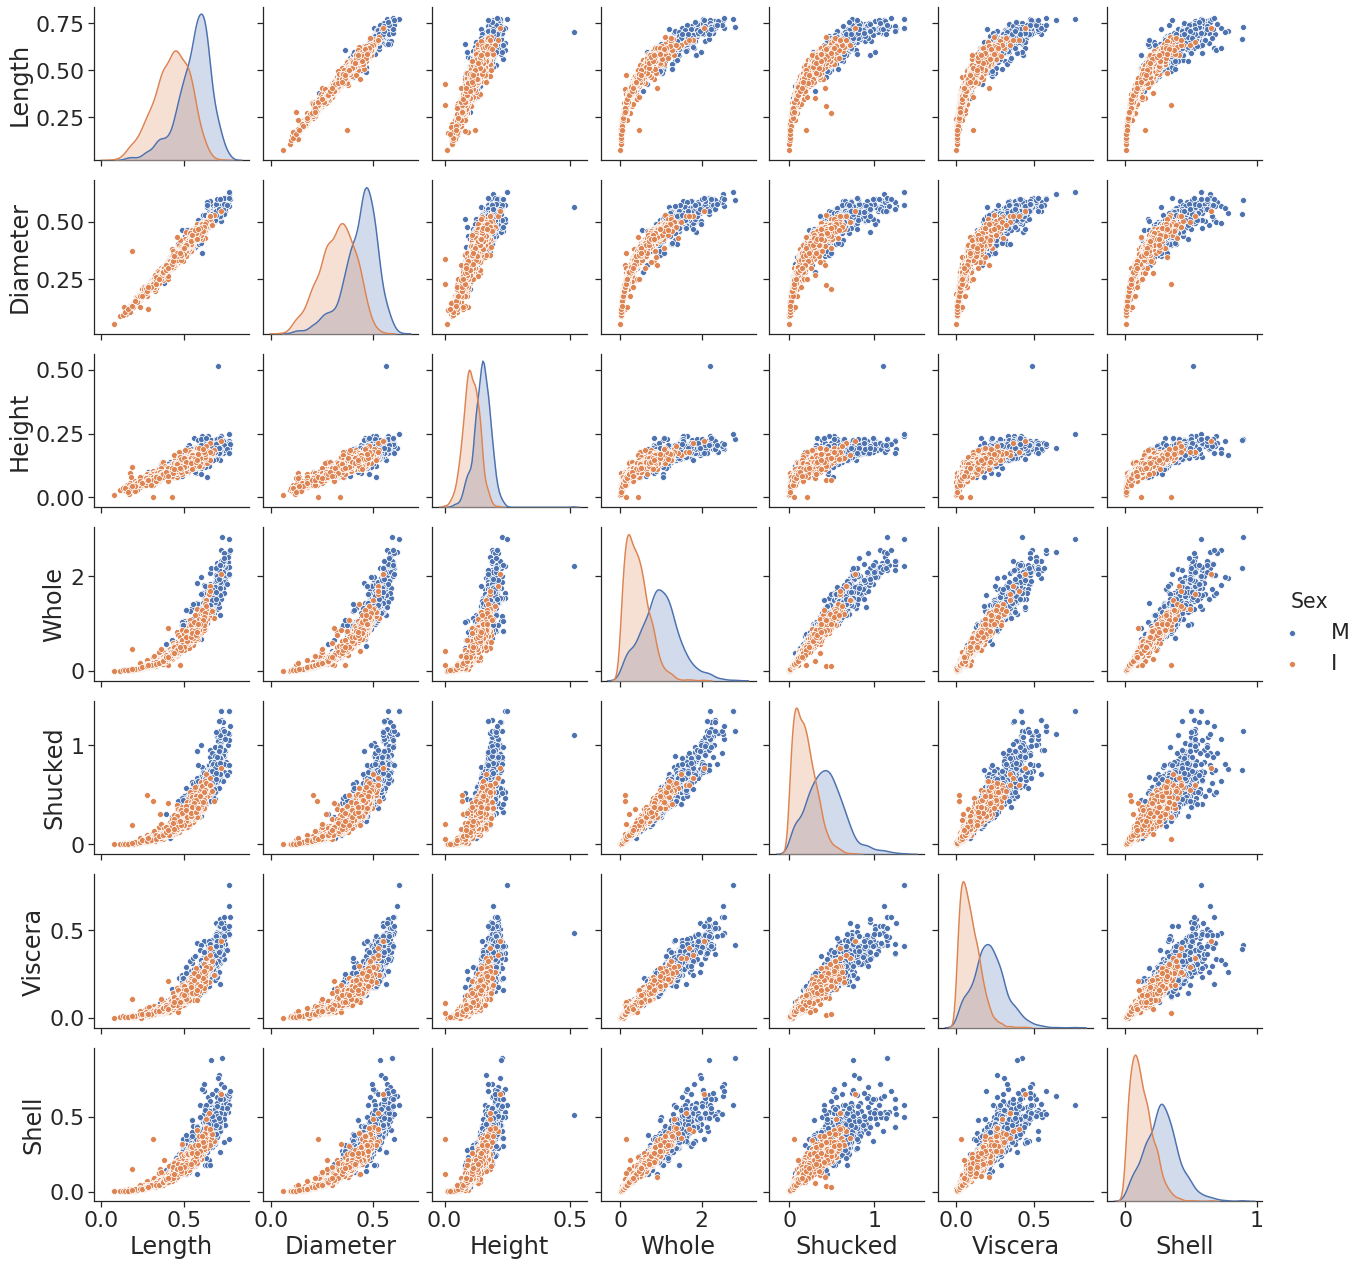

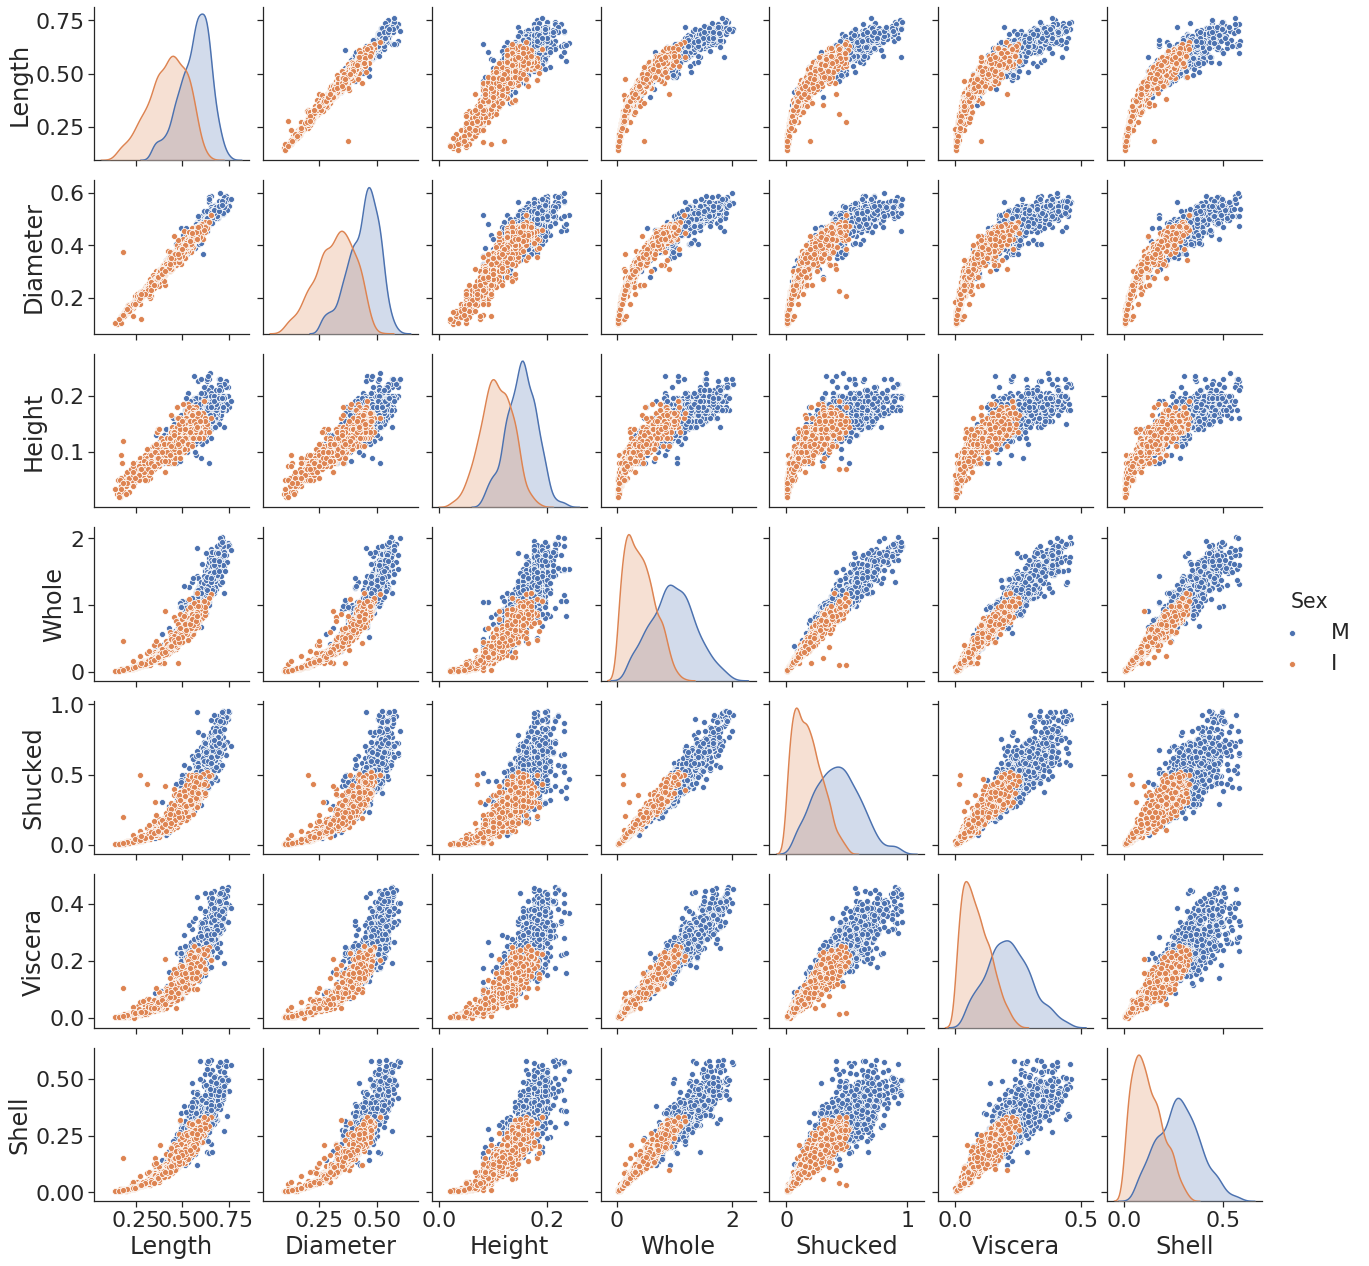

In [32]:
g = sns.pairplot(male_inf_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Sex']], hue='Sex')
g = sns.pairplot(pd.concat([male, infant]).loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Sex']], hue='Sex')

#

# Observations
Ok by the looks of it, the removal of outliers has done few things to the distribution of the samples:
- Very extreme outliers were removed thus bringing in normal distribution representation.
- Even though there are some outliers present, the distribution seems to look cohesive as a whole. For example:
    - If you look at length, Diameter and Height, they may seem that they look identical before and after outlier removal. But it it looks like the amended dataset has a more prominent 'Male' label since there's no single instance of 'Infant' within it.


In [33]:
# Merging the frames together and training time
outlier_removed_df = pd.concat([male, infant])
outlier_removed_df.loc[:, 'Sex'] = outlier_removed_df['Sex'].apply(lambda sex: 0.0 if sex == 'I' else 1.0)

X = outlier_removed_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
y = np.ravel(outlier_removed_df.loc[:, ['Sex']].to_numpy())

lrcv = LogisticRegressionCV(max_iter=800)
lrcv.fit(X, y)
print("The score:", lrcv.score(X, y))

lrcv = LogisticRegressionCV(cv=10, max_iter=800)
lrcv.fit(X, y)
print("The score with manual cv:", lrcv.score(X, y))
#

The score: 0.8176077265973254
The score with manual cv: 0.8176077265973254


In [34]:
with_outliers_df = male_inf_df.copy()
with_outliers_df.loc[:, 'Sex'] = with_outliers_df['Sex'].apply(lambda sex: 0.0 if sex == 'I' else 1.0)

X_with_outliers = with_outliers_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
y_with_outliers = np.ravel(with_outliers_df.loc[:, ['Sex']].to_numpy())

lrcv = LogisticRegressionCV(max_iter=800)
lrcv.fit(X, y)
print("The score:", lrcv.score(X_with_outliers, y_with_outliers))

lrcv = LogisticRegressionCV(cv=10, max_iter=800)
lrcv.fit(X, y)
print("The score with manual cv:", lrcv.score(X_with_outliers, y_with_outliers))

#

The score: 0.7912891986062718
The score with manual cv: 0.7912891986062718


Ok this is very impressive accuracy gain even when you provide dataset with **outliers**!

Now I am just curious what will happen if I remove outliers for the female class and then merge all datasets together.



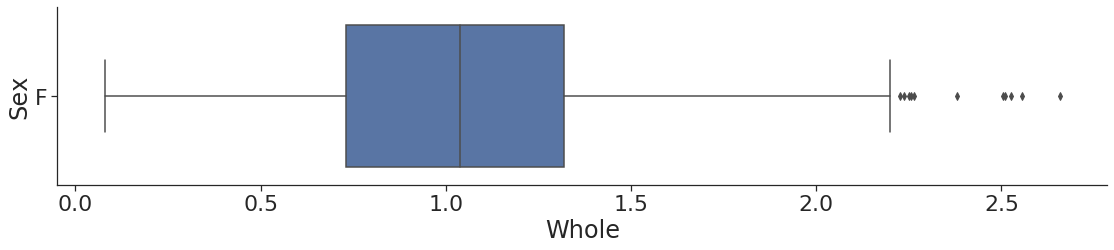

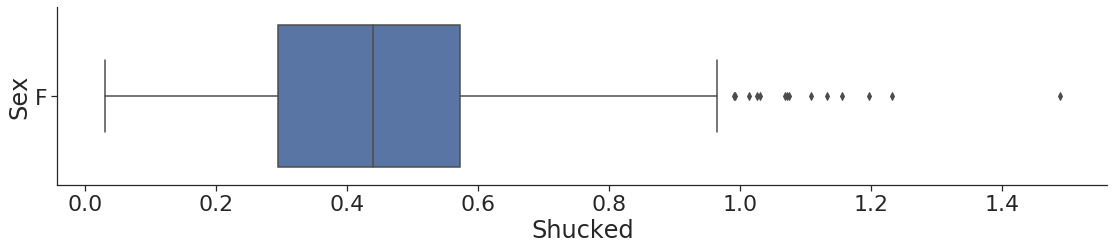

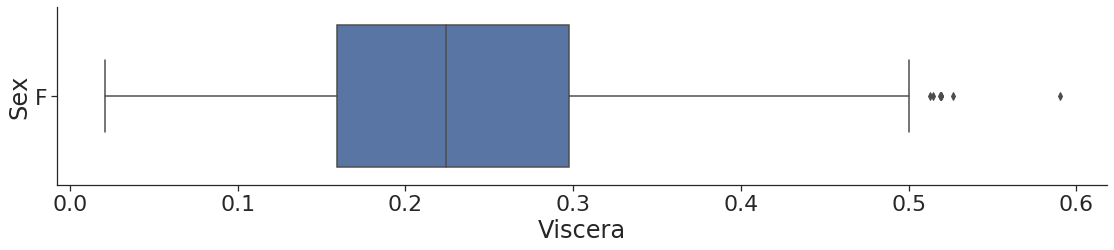

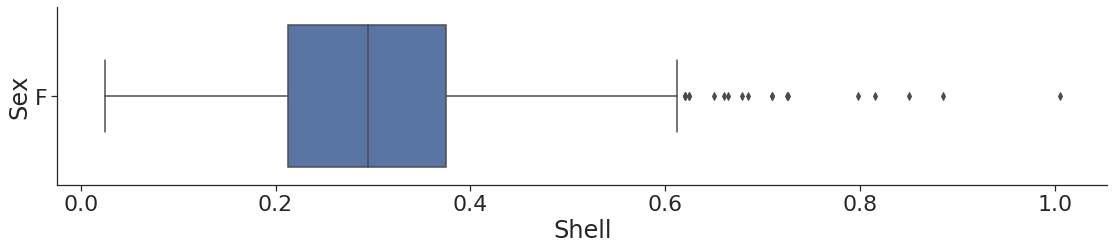

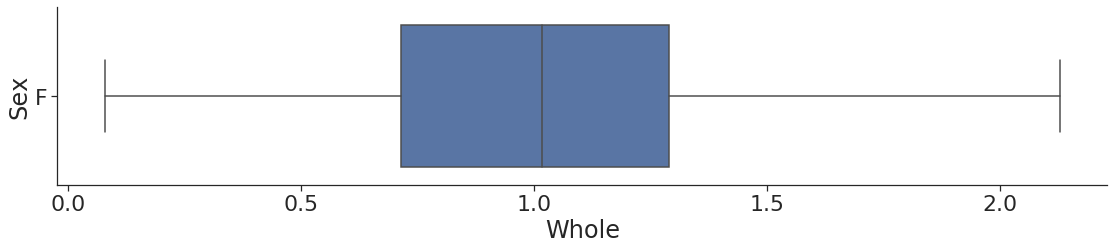

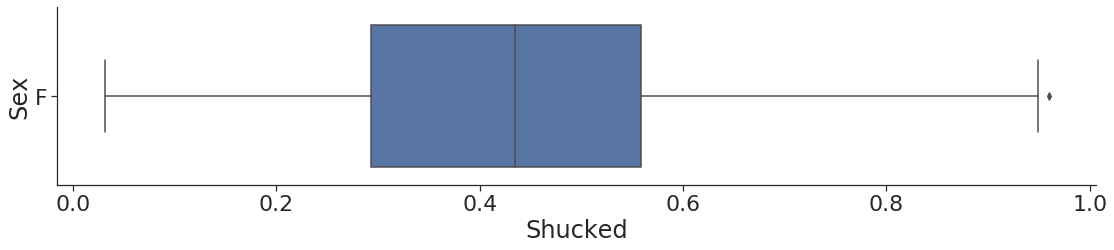

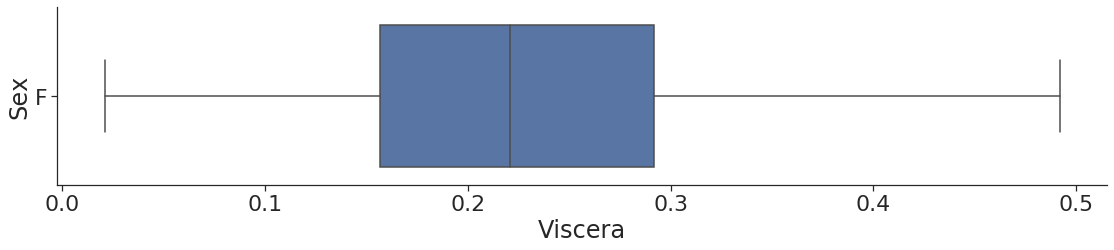

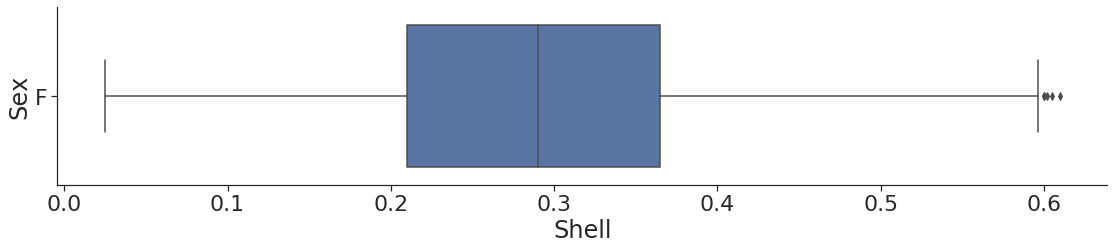

In [35]:
female = df[df['Sex'] == 'F']
g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Shucked", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Viscera", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Shell", y="Sex", kind="box", height=4, aspect=4, data=female)

female = female[female['Whole'] <= get_upper_whiskers(female, 'Whole')]
female = female[female['Shucked'] <= get_upper_whiskers(female, 'Shucked')]
female = female[female['Viscera'] <= get_upper_whiskers(female, 'Viscera')]
female = female[female['Shell'] <= get_upper_whiskers(female, 'Shell')]

g = sns.catplot(x="Whole", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Shucked", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Viscera", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Shell", y="Sex", kind="box", height=4, aspect=4, data=female)

#

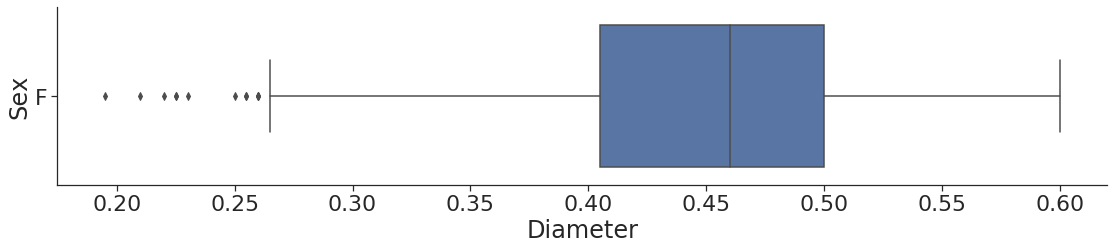

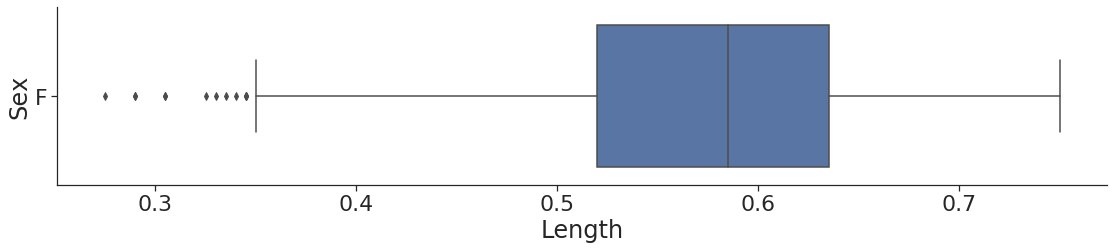

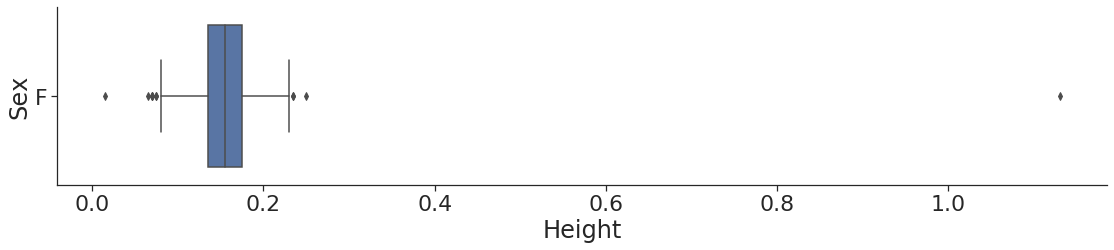

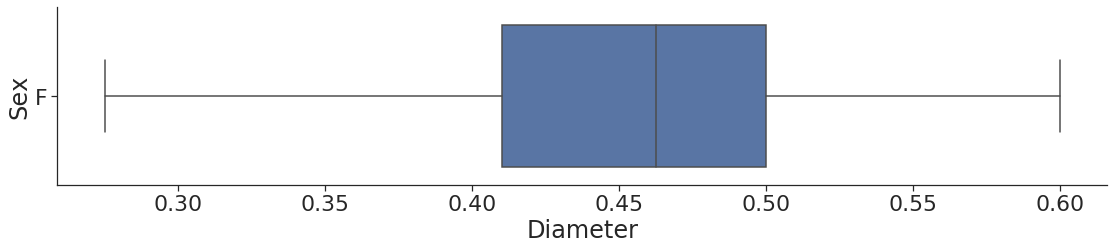

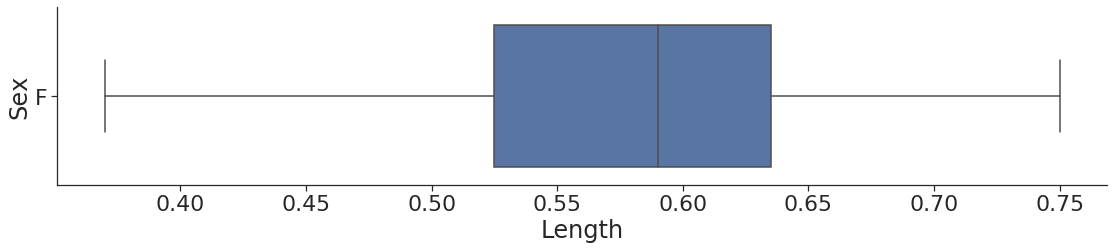

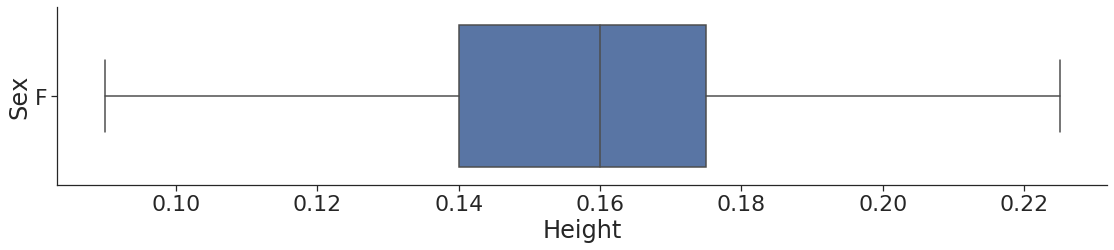

In [36]:
g = sns.catplot(x="Diameter", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Length", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=female)

female = female[female['Length'] >= get_lower_whiskers(female, 'Length')]
female = female[female['Diameter'] >= get_lower_whiskers(female, 'Diameter')]
female = female[female['Height'] >= get_lower_whiskers(female, 'Height')]
female = female[female['Height'] <= get_upper_whiskers(female, 'Height')]

g = sns.catplot(x="Diameter", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Length", y="Sex", kind="box", height=4, aspect=4, data=female)
g = sns.catplot(x="Height", y="Sex", kind="box", height=4, aspect=4, data=female)

#

In [37]:
# Ok merging time
without_outliers_all_df = pd.concat([male, female, infant])
X = without_outliers_all_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
y = np.ravel(without_outliers_all_df.loc[:, ['Sex']].to_numpy())

lrcv = LogisticRegressionCV(max_iter=800)
lrcv.fit(X, y)
print("The score:", lrcv.score(X, y))

#

The score: 0.5708841463414634


In [38]:
# Ok merging time but with new added features
without_outliers_all_df = pd.concat([male, female, infant])
X = without_outliers_all_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell', 'Mcubed_per_shell_weight', 'Mcubed_per_shucked_weight', 'Mcubed_per_viscera_weight', 'Mcubed_per_whole_weight']].to_numpy()
y = np.ravel(without_outliers_all_df.loc[:, ['Sex']].to_numpy())

lrcv = LogisticRegressionCV(max_iter=800)
lrcv.fit(X, y)
print("The score:", lrcv.score(X, y))

#

The score: 0.5734247967479674


In [39]:
# Testing with all data samples
without_outliers_all_df = pd.concat([male, female, infant])
X = without_outliers_all_df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
y = np.ravel(without_outliers_all_df.loc[:, ['Sex']].to_numpy())
X_with_outliers_all_l = df.loc[:, ['Length', 'Diameter', 'Height', 'Whole', 'Shucked', 'Viscera', 'Shell']].to_numpy()
y_with_outliers_all_l = np.ravel(df.loc[:, ['Sex']].to_numpy())

lrcv = LogisticRegressionCV(max_iter=800)
lrcv.fit(X, y)
print("The score:", lrcv.score(X_with_outliers_all_l, y_with_outliers_all_l))

The score: 0.5549437395259755
